In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, linear_model
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.multioutput import MultiOutputRegressor
import numpy as np
from sklearn.model_selection import train_test_split


In [8]:
df = pd.read_csv("data/df_meam_params.csv", index_col=0)
#df = df.fillna("")
df = df.set_index(["model","species"])
# get list of meam params
param_list = df.columns.to_list()[0:37]
df = df.reset_index()

In [9]:
fixed_indicators = ['z','ielement','atwt','alat','ibar','rho0','re']
alt_indicators = ['alpha','b0','b1','b2','b3','esub','asub',
				  't1','t2','t3','rozero','rc','delr','zbl',
				  'attrac','repuls','Cmin','Cmax','Ec']

all_indicators = fixed_indicators + alt_indicators

In [10]:
# property list to explore, commented out props with few data points
prop_list = ['lattice_constant_fcc', 'bulk_modulus_fcc',
            'c44_fcc', 'c12_fcc', 'c11_fcc',
            'cohesive_energy_fcc', 
            #'thermal_expansion_coeff_fcc', # not a lot of points
            #'surface_energy_100_fcc', # not a lot of points
            #'extr_stack_fault_energy_fcc', 'intr_stack_fault_energy_fcc',
            #'unstable_stack_energy_fcc', 'unstable_twinning_energy_fcc',
            #'relaxed_formation_potential_energy_fcc',
            #'unrelaxed_formation_potential_energy_fcc',
            #'vacancy_migration_energy_fcc', 
            #'relaxation_volume_fcc'
            ]

In [11]:
# y_train = []
# y_test = []
# y_train_pred = []
# y_test_pred = []
# for prop in prop_list:
#     df = df.copy().dropna(subset=[prop])
#     df_train, df_test = train_test_split(df, shuffle=True)
#     X_train = df_train[all_indicators]
#     y_train.append(df_train[prop_list])
#     X_test = df_test[all_indicators]
#     y_test.append(df_test[prop_list])

#     imput = KNNImputer(n_neighbors=2, weights="uniform",
#                         keep_empty_features=True)
#     pca = PCA()
#     model = svm.SVR(kernel='rbf')

#     pipe = Pipeline(steps=[('scale', StandardScaler()),
#                         ('imp', imput),
#                         ('pca', pca),
#                         ('lr', model)])
#     pipe = TransformedTargetRegressor(regressor=pipe,
#                                     transformer=StandardScaler())
#     pipe.fit(X_train,y_train[-1][prop])
#     y_train_pred.append(pipe.predict(X_train))
#     y_test_pred.append(pipe.predict(X_test))

df = df.copy().dropna(subset=prop_list)
df_train, df_test = train_test_split(df, shuffle=True)
X_train = df_train[all_indicators]
y_train= df_train[prop_list]
X_test = df_test[all_indicators]
y_test = df_test[prop_list]

imput = KNNImputer(n_neighbors=2, weights="uniform",
                    keep_empty_features=True)
pca = PCA()
model = MultiOutputRegressor(svm.SVR(kernel='rbf'))
#model = MultiOutputRegressor(linear_model.LinearRegression())

pipe = Pipeline(steps=[('scale', StandardScaler()),
                    ('imp', imput),
                    ('pca', pca),
                    ('lr', model)])
pipe = TransformedTargetRegressor(regressor=pipe,
                                transformer=StandardScaler())
pipe.fit(X_train,y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

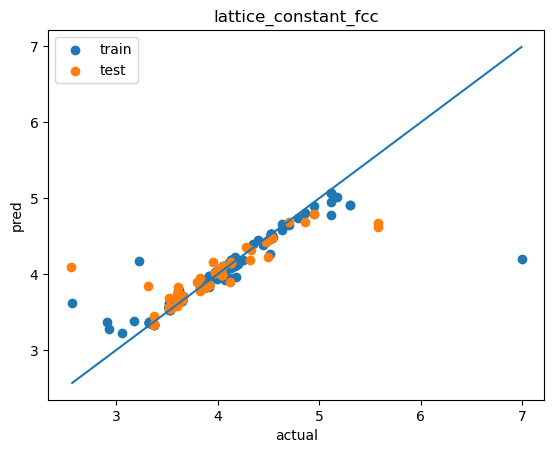

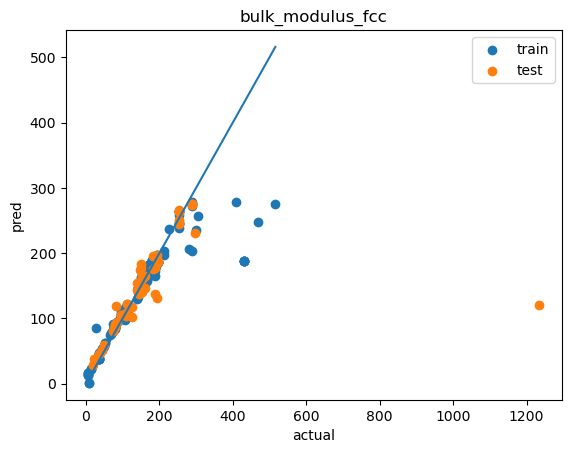

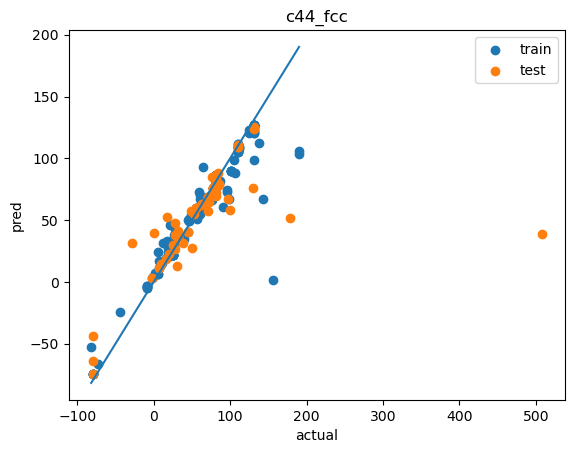

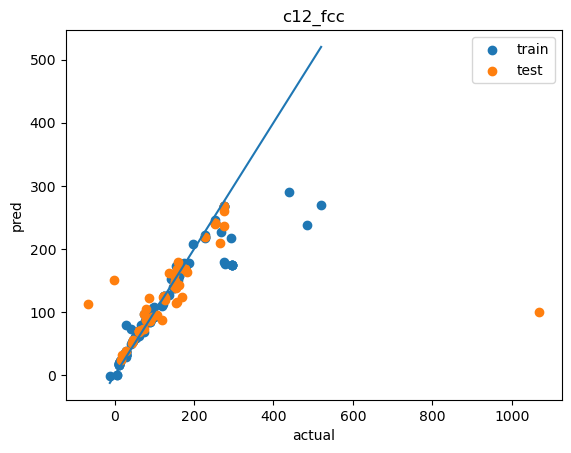

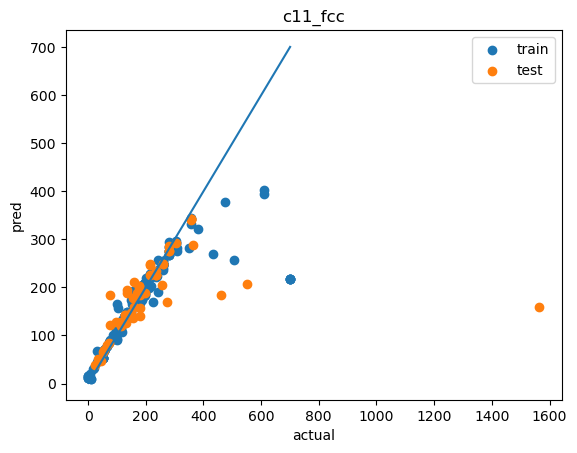

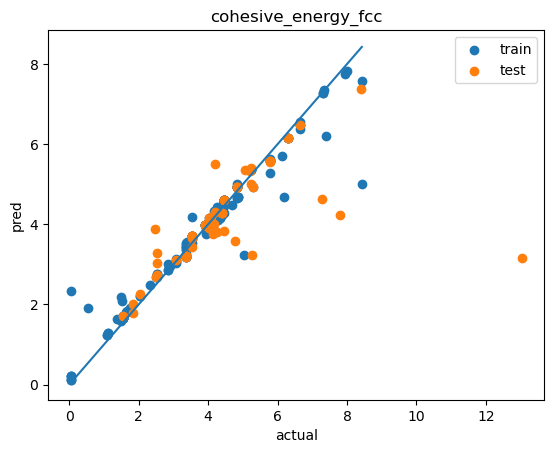

In [12]:
# for i,prop in enumerate(prop_list):
#     plt.figure()
#     plt.scatter(y_train[i][prop],y_train_pred[i],label="train")
#     plt.scatter(y_test[i][prop],y_test_pred[i],label="test")
#     plt.plot([min(y_train[i][prop]),max(y_train[i][prop])],
#              [min(y_train[i][prop]),max(y_train[i][prop])])
#     plt.xlabel('actual')
#     plt.ylabel('pred')
#     plt.legend()
#     plt.title(prop)

for i,prop in enumerate(prop_list):
    plt.figure()
    plt.scatter(y_train.iloc[:,i],y_train_pred[:,i],label="train")
    plt.scatter(y_test.iloc[:,i],y_test_pred[:,i],label="test")
    plt.plot([min(y_train.iloc[:,i]),max(y_train.iloc[:,i])],
             [min(y_train.iloc[:,i]),max(y_train.iloc[:,i])])
    plt.xlabel('actual')
    plt.ylabel('pred')
    plt.legend()
    plt.title(prop)